In [25]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#### **Task 6**: How many states cover 50% of US air traffic? 

* By origin or destination?  Overall?

In [26]:
path = '/home/jewelle/data_bootcamp/'

In [27]:
flights_df =  pd.read_csv(path +'flights_df_clean.csv')

In [28]:
flights_df.head()

,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-01-23 00:00:00,UA_CODESHARE,UA,3405,YX,N653RW,3405,10821,BWI,"Baltimore, MD",...,75.0,89.0,49.0,1.0,169.0,0.0,0.0,0.0,0.0,0.0
1,2018-11-15 00:00:00,AA_CODESHARE,AA,5683,OH,N594NN,5683,11057,CLT,"Charlotte, NC",...,136.0,122.0,99.0,1.0,640.0,0.0,0.0,0.0,0.0,0.0
2,2019-10-29 00:00:00,WN,WN,2434,WN,N432WN,2434,12889,LAS,"Las Vegas, NV",...,155.0,156.0,139.0,1.0,867.0,0.0,0.0,0.0,0.0,0.0
3,2019-11-14 00:00:00,B6,B6,577,B6,N968JT,577,11697,FLL,"Fort Lauderdale, FL",...,385.0,371.0,346.0,1.0,2584.0,0.0,0.0,0.0,0.0,0.0
4,2019-05-22 00:00:00,DL_CODESHARE,DL,3762,OO,N8933B,3762,10397,ATL,"Atlanta, GA",...,107.0,90.0,73.0,1.0,508.0,0.0,0.0,0.0,0.0,0.0


In [29]:
flights_df.dtypes

fl_date                 object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time            object
dep_time                object
dep_delay              float64
taxi_out               float64
wheels_off              object
wheels_on               object
taxi_in                float64
crs_arr_time            object
arr_time                object
arr_delay              float64
cancelled              float64
diverted               float64
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance               float64
carrier_delay          float64
weather_delay          float64
nas_dela

In [30]:
#There's no state name column, but there are origin_city_name and dest_city_name
flights_df[['origin_city_name', 'dest_city_name']].head()
#And they have the US state codes

,origin_city_name,dest_city_name
0,"Baltimore, MD","Newark, NJ"
1,"Charlotte, NC","Little Rock, AR"
2,"Las Vegas, NV","Seattle, WA"
3,"Fort Lauderdale, FL","San Francisco, CA"
4,"Atlanta, GA","Fort Wayne, IN"


In [31]:
#split states into separate column
flights_df['origin_state'] = flights_df['origin_city_name'].apply(lambda x: x.split(', ')[1])
flights_df['dest_state'] = flights_df['dest_city_name'].apply(lambda x: x.split(', ')[1])

In [47]:
#tally flights by state of origin and destination
flights_per_state_origin = flights_df.groupby('origin_state')['fl_date'].count().sort_values(ascending=False)
flights_per_state_dest = flights_df.groupby('dest_state')['fl_date'].count().sort_values(ascending=False)

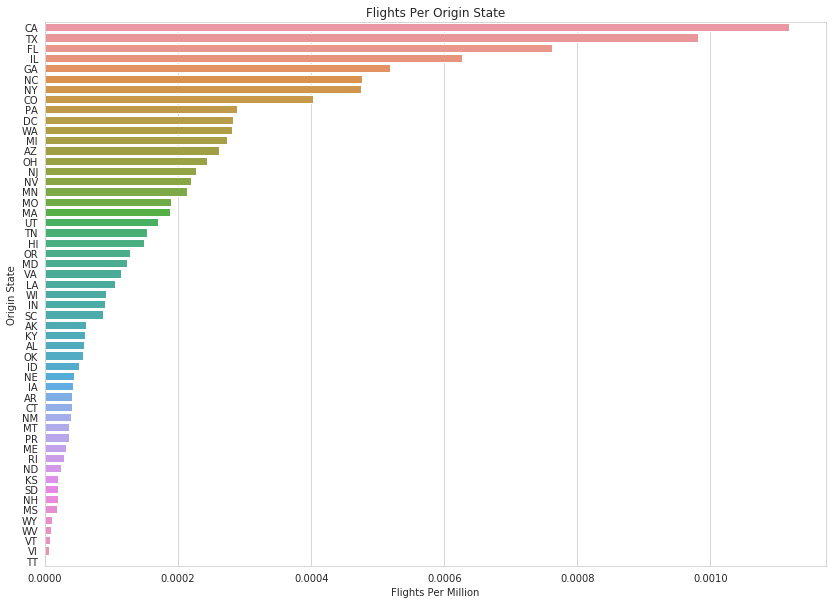

In [56]:
axis = plt.subplots(figsize=(14,10))

sns.set_style("whitegrid")
ax = sns.barplot(x = flights_per_state_origin.values/1000000, y = flights_per_state_origin.index)
ax.set(title='Flights Per Origin State', xlabel='Flights Per Million', ylabel='Origin State');

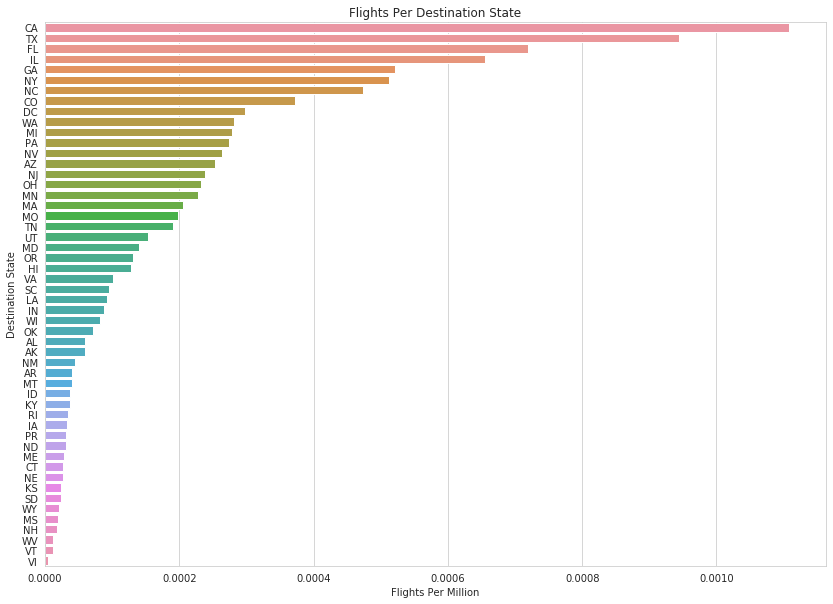

In [57]:
axis = plt.subplots(figsize=(14,10))

sns.set_style("whitegrid")
ax = sns.barplot(x = flights_per_state_dest.values/1000000, y = flights_per_state_dest.index)
ax.set(title='Flights Per Destination State', xlabel='Flights Per Million', ylabel='Destination State');
#Clear majorities just by viewing this graph and the one above
#The top few states don't change much but there are some differences between the two.

In [84]:
#To account for discrepancies between flight destinations and origins, total flights per state
total_flights = flights_per_state_origin + flights_per_state_dest
t = total_flights.sum()*0.5
states = []
total = 0
onemore = False

In [85]:
for state, num in total_flights.sort_values(ascending=False).items():
  
    if total <= t:
        states.append(state)
        total += num
    
    if total > t:
        onemore = True
    
    elif onemore == True:
        break

In [87]:
print(f'Top {len(states)} states in US Air Traffic:')
for state in states:
    print(state)
#These states combined total >50% US air traffic

Top 8 states in US Air Traffic:
CA
TX
FL
IL
GA
NY
NC
CO


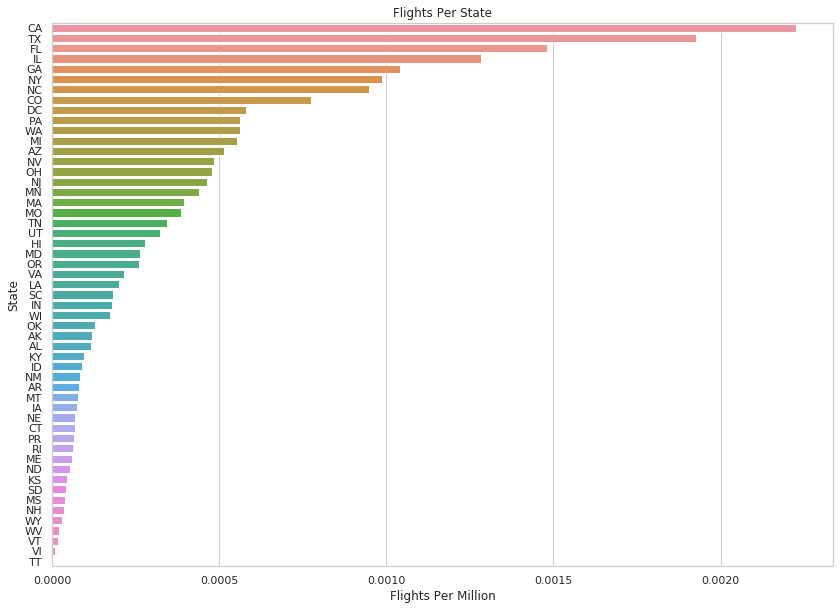

In [88]:
#Graph Total Flights Per State
axis = plt.subplots(figsize=(14,10))

sns.set(style="whitegrid")
ax = sns.barplot(x=total_flights.sort_values(ascending=False).values/1000000, y=total_flights.sort_values(ascending=False).index)
ax.set(title='Flights Per State', xlabel='Flights Per Million', ylabel='State');